In [148]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data file using pandas. 

In [109]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [110]:
data.shape

(10841, 13)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Check for null values in the data. Get the number of null values for each column.

In [112]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Drop records with nulls in any of the columns.

In [113]:
data = data.dropna().reset_index(drop=True)

In [114]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

# Variables seem to have incorrect type and inconsistent formatting. You need to fix them:

1. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

	1.1.Extract the numeric value from the column
    
	1.2.Multiply the value by 1,000, if size is mentioned in Mb
    

In [115]:
data["Size"] = [ (1000 * float(i.split('M')[0])) if 'M' in i else (float(i.split('k')[0]) if 'k' in i else float(0)) for i in data["Size"]  ]

In [116]:
# data["Size"] = 1000 * data["Size"]

2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 950.8+ KB


In [118]:
data["Reviews"] = data["Reviews"].astype(float)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), object(10)
memory usage: 950.8+ KB


3. Installs field is currently stored as string and has values like 1,000,000+. 

	3.1. Treat 1,000,000+ as 1,000,000
    
	3.2. remove ‘+’, ‘,’ from the field, convert it to integer

In [120]:
data["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in data["Installs"] ]

In [121]:
data["Installs"] = data["Installs"].astype(int)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 914.2+ KB


4. Price field is a string and has `$` symbol. Remove `$` sign, and convert it to numeric.

In [123]:
data['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in data['Price'] ]

In [124]:
data["Price"] = data["Price"].astype(int)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   int32  
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 877.6+ KB


# Sanity checks

1. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [126]:
round(data['Rating'].describe(), 2)

count    9360.00
mean        4.19
std         0.52
min         1.00
25%         4.00
50%         4.30
75%         4.50
max         5.00
Name: Rating, dtype: float64

In [127]:
# no need to run this cell; It's already in range
data = data[(1 <= data['Rating']) & (data['Rating'] <= 5) ].reset_index(drop=True)

In [128]:
round(data['Rating'].describe(), 2)

count    9360.00
mean        4.19
std         0.52
min         1.00
25%         4.00
50%         4.30
75%         4.50
max         5.00
Name: Rating, dtype: float64

2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [130]:
data = data[(data['Reviews'] <= data['Installs']) ].reset_index(drop=True)

In [131]:
data.shape

(9353, 13)

3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [141]:
data.drop(data[(data['Type'] =='Free') & (data['Price'] > 0 )].index, inplace = True)

In [142]:
data.shape

(9353, 13)

# Performing univariate analysis

- Boxplot for Price

	- Are there any outliers? Think about the price of usual apps on Play Store.


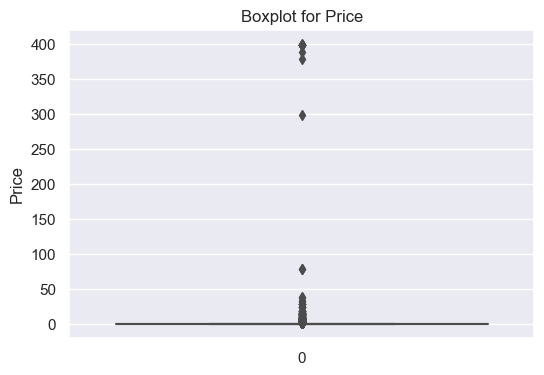

In [153]:
sns.boxplot(data['Price'])
plt.title('Boxplot for Price')
#plt.xlabel('Boxplot')
plt.ylabel('Price')
plt.show()

In [167]:
round(data['Price'].describe(), 2)

count    9353.00
mean        0.90
std        15.78
min         0.00
25%         0.00
50%         0.00
75%         0.00
max       400.00
Name: Price, dtype: float64

- **observation** : There are outliers and the price of usual apps on Play Store is `0.90`.

- Boxplot for Reviews

	- Are there any apps with very high number of reviews? Do the values seem right?


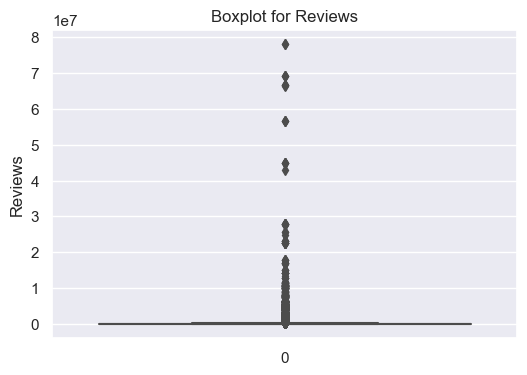

In [168]:
sns.boxplot(data['Reviews'])
plt.title('Boxplot for Reviews')
plt.ylabel('Reviews')
plt.show()

In [169]:
round(data['Reviews'].describe(), 2)

count        9353.00
mean       514760.58
std       3146168.75
min             1.00
25%           187.00
50%          5967.00
75%         81747.00
max      78158306.00
Name: Reviews, dtype: float64

- **observation** : There are apps with very high number of reviews and  the values are not seem right `78158306.00`.

- Histogram for Rating

	- How are the ratings distributed? Is it more toward higher ratings?


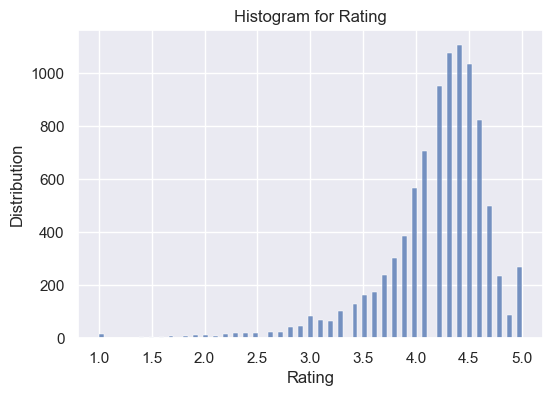

In [175]:
sns.histplot(data['Rating'])
plt.title('Histogram for Rating')
plt.xlabel('Rating')
plt.ylabel('Distribution')
plt.show()

- **observation** : The ratings are left skewed distributed and it is more toward higher ratings.

- Histogram for Size

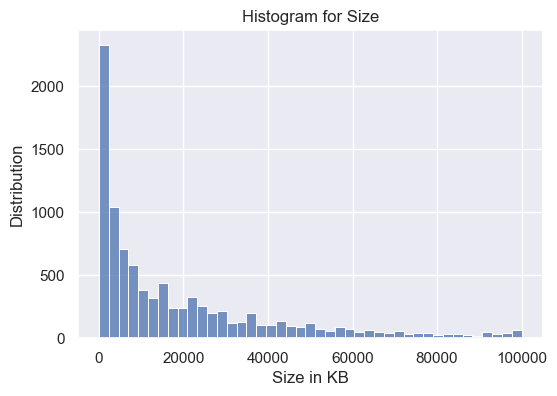

In [177]:
sns.histplot(data['Size'])
plt.title('Histogram for Size')
plt.xlabel('Size in KB')
plt.ylabel('Distribution')
plt.show()

# Outlier treatment: 
1. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    
	1.1. Check out the records with very high price
    
		1.1.1. Is 200 indeed a high price?
        
	1.2. Drop these as most seem to be junk apps


In [182]:
len(data[(data['Price'] > 200)])

15

In [183]:
data.drop(data[data['Price'] > 200].index, inplace = True)

In [184]:
data.shape

(9338, 13)

2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [185]:
data.drop(data[data['Reviews'] > 2000000].index, inplace = True)

In [186]:
data.shape

(8885, 13)

3. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
    
	3.1. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
    
	3.2. Decide a threshold as cutoff for outlier and drop records having values more than that


In [187]:
data.quantile([.1, .25, .5, .70, .90, .95, .99], axis = 0) 

C:\Users\munge\AppData\Local\Temp\ipykernel_7240\682430940.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.quantile([.1, .25, .5, .70, .90, .95, .99], axis = 0)


,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,0.0,1000.0,0.0
0.25,4.0,159.00,2600.0,10000.0,0.0
0.50,4.3,4290.00,9500.0,500000.0,0.0
0.70,4.5,35930.40,23000.0,1000000.0,0.0
0.90,4.7,296771.00,50000.0,10000000.0,0.0
0.95,4.8,637298.00,68000.0,10000000.0,1.0
0.99,5.0,1462800.88,95000.0,100000000.0,7.0


In [188]:
# dropping more than 10000000 Installs value
data.drop(data[data['Installs'] > 10000000].index, inplace = True)

In [189]:
data.shape

(8496, 13)

# Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

1. Make scatter plot/joinplot for Rating vs. Price

	1.1. What pattern do you observe? Does rating increase with price?


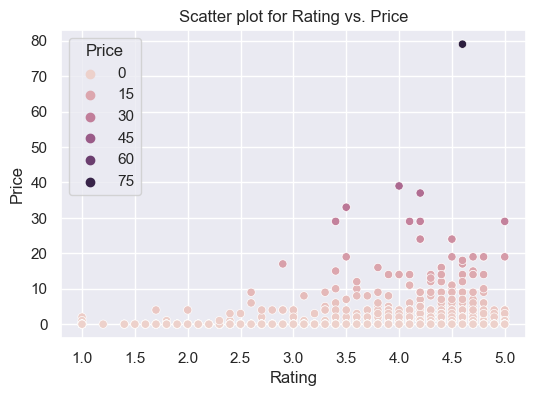

In [197]:
sns.scatterplot(data=data, x='Rating', y='Price', hue='Price')
plt.title('Scatter plot for Rating vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

 - **observation** : Paid apps are higher ratings comapre to free apps.

2. Make scatter plot/joinplot for Rating vs. Size

	2.1. Are heavier apps rated better?


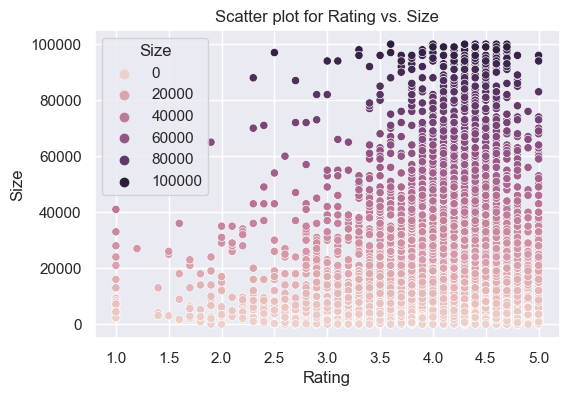

In [198]:
sns.scatterplot(data=data, x='Rating', y='Size', hue='Size')
plt.title('Scatter plot for Rating vs. Size')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.show()

 - **observation** : It is clear that heavior apps are rated better.

3. Make scatter plot/joinplot for Rating vs. Reviews

	3.1. Does more review mean a better rating always?


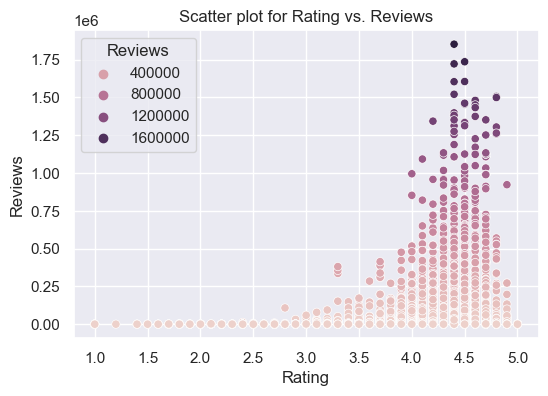

In [199]:
sns.scatterplot(data=data, x='Rating', y='Reviews', hue='Reviews')
plt.title('Scatter plot for Rating vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

 - **observation** : It is cristal clear that more reviews makes app rating better.

4. Make boxplot for Rating vs. Content Rating

	4.1. Is there any difference in the ratings? Are some types liked better?


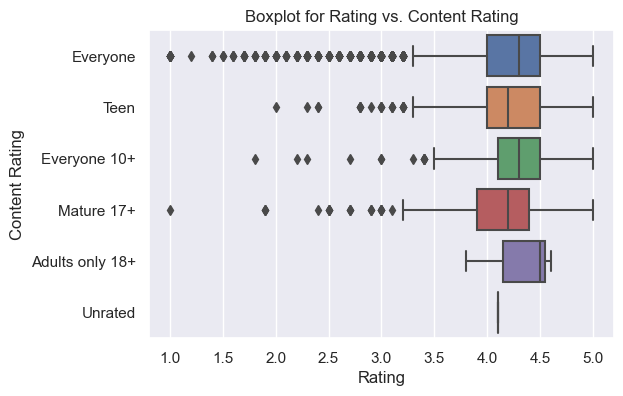

In [200]:
sns.boxplot(data=data, x="Rating", y="Content Rating")
plt.title('Boxplot for Rating vs. Content Rating')
plt.xlabel('Rating')
plt.ylabel('Content Rating')
plt.show()

- **observation** : Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings.

5. Make boxplot for Ratings vs. Category

	5.1. Which genre has the best ratings?


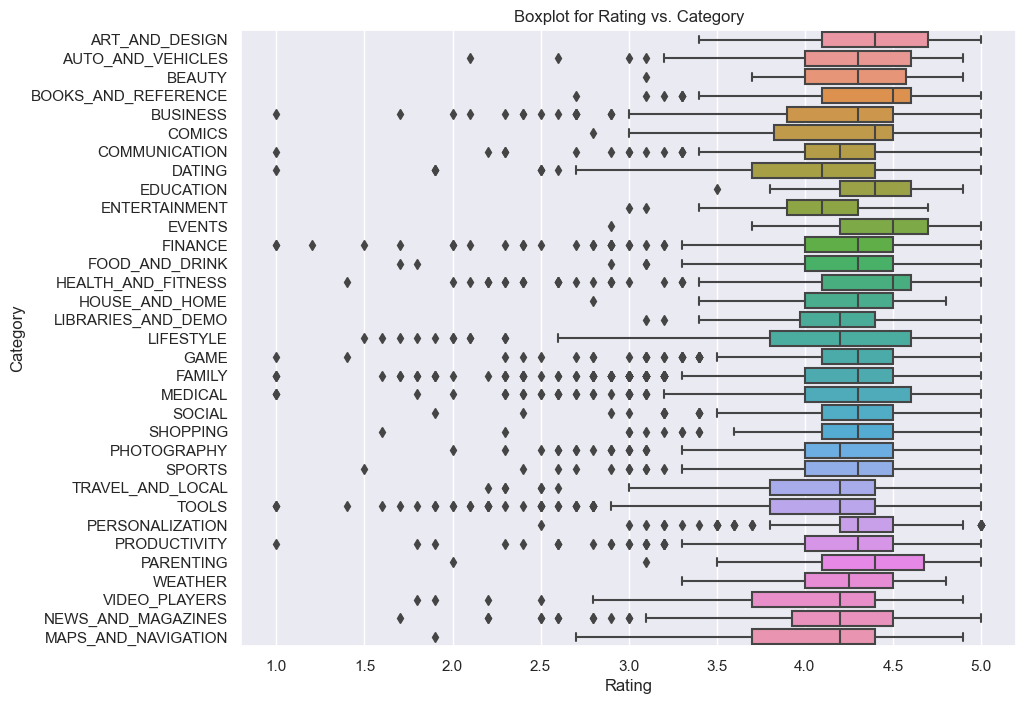

In [202]:
sns.set(rc={'figure.figsize':(10,8)})

sns.boxplot(data=data, x="Rating", y="Category")
plt.title('Boxplot for Rating vs. Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

- **observation** : Events category has best ratings compare to others.